In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("cleaned-dataset.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Label
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


# 1. Modelling with original data after cleaning 

In [3]:
# Split the data into features (X) and labels (y)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Define a dictionary to store the results of each model
results = {}

In [4]:
# Train Logistic Regression model
model_LR = LogisticRegression(max_iter=1000)
model_LR.fit(X_train, y_train)

# Predict the target values for test set
y_pred_LR = model_LR.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_LR = accuracy_score(y_test, y_pred_LR)
precision_LR = precision_score(y_test, y_pred_LR)
recall_LR = recall_score(y_test, y_pred_LR)
f1_LR = f1_score(y_test, y_pred_LR)

# Store the results of Logistic Regression model in the dictionary
results["Logistic Regression"] = {"accuracy": accuracy_LR, 
                                  "precision": precision_LR, 
                                  "recall": recall_LR, 
                                  "f1_score": f1_LR
                                 }

In [5]:
# Train Naive Bayes model
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

# Predict the target values for test set
y_pred_NB = model_NB.predict(X_test)

# Evaluate the Naive Bayes model
accuracy_NB = accuracy_score(y_test, y_pred_NB)
precision_NB = precision_score(y_test, y_pred_NB)
recall_NB = recall_score(y_test, y_pred_NB)
f1_NB = f1_score(y_test, y_pred_NB)

# Store the results of Naive Bayes model in the dictionary
results["Naive Bayes"] = {"accuracy": accuracy_NB, 
                          "precision": precision_NB, 
                          "recall": recall_NB, 
                          "f1_score": f1_NB
                         }

In [6]:
# Train Decision Tree model
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)

# Predict the target values for test set
y_pred_DT = model_DT.predict(X_test)

# Evaluate the Decision Tree model
accuracy_DT = accuracy_score(y_test, y_pred_DT)
precision_DT = precision_score(y_test, y_pred_DT)
recall_DT = recall_score(y_test, y_pred_DT)
f1_DT = f1_score(y_test, y_pred_DT)

# Store the results of Decision Tree model in the dictionary
results["Decision Tree"] = {"accuracy": accuracy_DT, 
                            "precision": precision_DT, 
                            "recall": recall_DT, 
                            "f1_score": f1_DT
                           }

In [7]:
# Train Random Forest model
model_RF = RandomForestClassifier()
model_RF.fit(X_train, y_train)

# Predict the target values for test set
y_pred_RF = model_RF.predict(X_test)

# Evaluate the Random Forest model
accuracy_RF = accuracy_score(y_test, y_pred_RF)
precision_RF = precision_score(y_test, y_pred_RF)
recall_RF = recall_score(y_test, y_pred_RF)
f1_RF = f1_score(y_test, y_pred_RF)

# Store the results of Random Forest model in the dictionary
results["Random Forest"] = {"accuracy": accuracy_RF, 
                            "precision": precision_RF, 
                            "recall": recall_RF, 
                            "f1_score": f1_RF
                           }

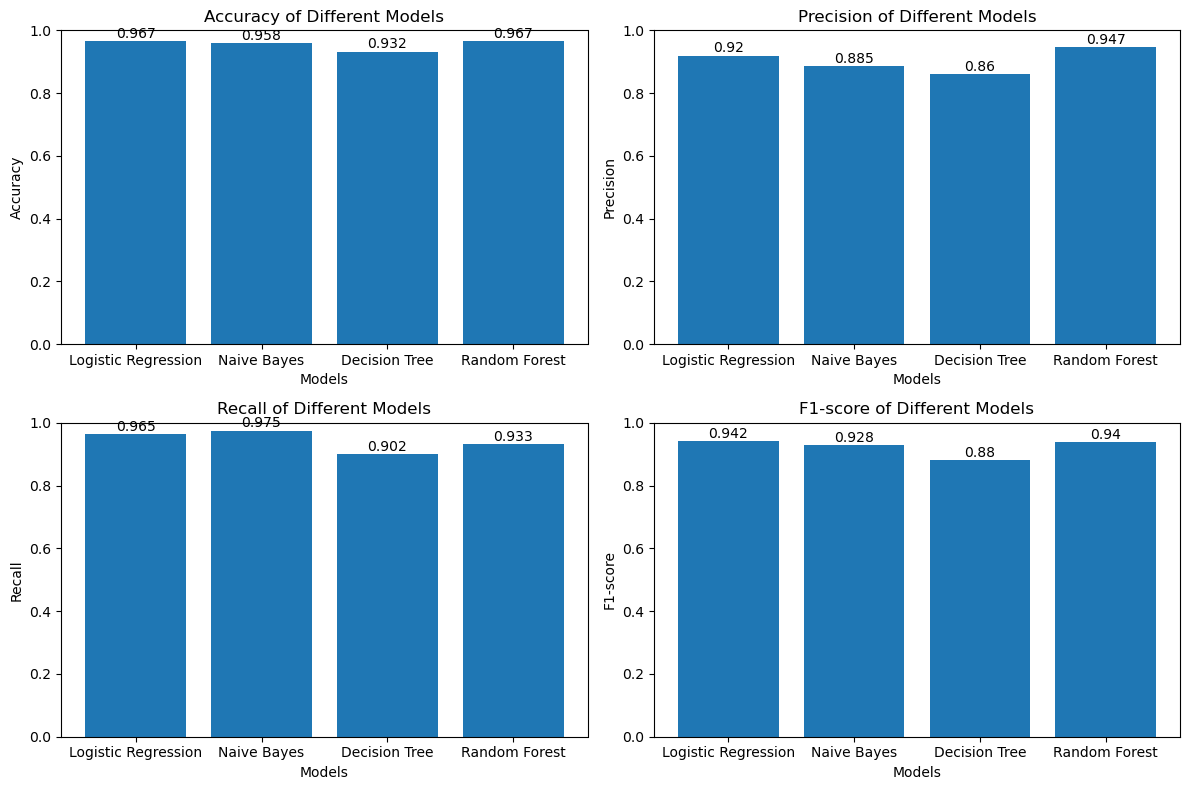

In [20]:
# Create a figure with 2 rows and 2 columns
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot accuracy
axs[0, 0].bar(results.keys(), [result["accuracy"] for result in results.values()])
axs[0, 0].set_title("Accuracy of Different Models")
axs[0, 0].set_xlabel("Models")
axs[0, 0].set_ylabel("Accuracy")
axs[0, 0].set_ylim(0, 1)

# Plot precision
axs[0, 1].bar(results.keys(), [result["precision"] for result in results.values()])
axs[0, 1].set_title("Precision of Different Models")
axs[0, 1].set_xlabel("Models")
axs[0, 1].set_ylabel("Precision")
axs[0, 1].set_ylim(0, 1)

# Plot recall
axs[1, 0].bar(results.keys(), [result["recall"] for result in results.values()])
axs[1, 0].set_title("Recall of Different Models")
axs[1, 0].set_xlabel("Models")
axs[1, 0].set_ylabel("Recall")
axs[1, 0].set_ylim(0, 1)

# Plot F1-score
axs[1, 1].bar(results.keys(), [result["f1_score"] for result in results.values()])
axs[1, 1].set_title("F1-score of Different Models")
axs[1, 1].set_xlabel("Models")
axs[1, 1].set_ylabel("F1-score")
axs[1, 1].set_ylim(0, 1)

# Adjust the layout of the subplots
plt.tight_layout()
for i, v in enumerate([result["accuracy"] for result in results.values()]):
    axs[0, 0].text(i, v + 0.01, str(round(v, 3)), ha='center')
    
for i, v in enumerate([result["precision"] for result in results.values()]):
    axs[0, 1].text(i, v + 0.01, str(round(v, 3)), ha='center')
    
for i, v in enumerate([result["recall"] for result in results.values()]):
    axs[1, 0].text(i, v + 0.01, str(round(v, 3)), ha='center')
    
for i, v in enumerate([result["f1_score"] for result in results.values()]):
    axs[1, 1].text(i, v + 0.01, str(round(v, 3)), ha='center')

# Show the figure
plt.show()

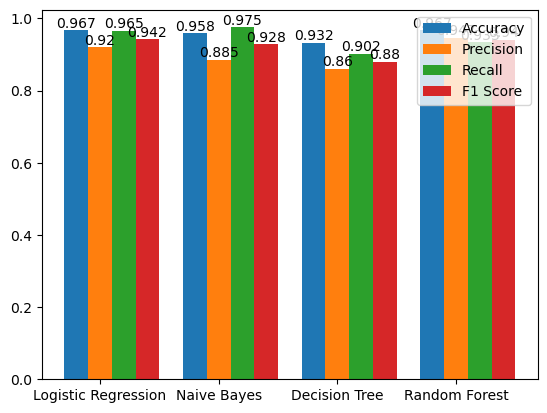

In [18]:
# extract metrics values
accuracies = [results[model]['accuracy'] for model in results]
precisions = [results[model]['precision'] for model in results]
recalls = [results[model]['recall'] for model in results]
f1_scores = [results[model]['f1_score'] for model in results]

# plot bar chart
bar_width = 0.2
index = np.arange(len(results))

plt.bar(index, accuracies, bar_width, label='Accuracy')
plt.bar(index + bar_width, precisions, bar_width, label='Precision')
plt.bar(index + 2 * bar_width, recalls, bar_width, label='Recall')
plt.bar(index + 3 * bar_width, f1_scores, bar_width, label='F1 Score')

plt.xticks(index + bar_width, list(results.keys()))
plt.legend()

# add numbers to each bar
for i in range(len(results)):
    plt.text(index[i], accuracies[i], str(round(accuracies[i], 3)), ha='center', va='bottom')
    plt.text(index[i] + bar_width, precisions[i], str(round(precisions[i], 3)), ha='center', va='bottom')
    plt.text(index[i] + 2 * bar_width, recalls[i], str(round(recalls[i], 3)), ha='center', va='bottom')
    plt.text(index[i] + 3 * bar_width, f1_scores[i], str(round(f1_scores[i], 3)), ha='center', va='bottom')

plt.show()

In [21]:
# Print the final results of all models
results

{'Logistic Regression': {'accuracy': 0.9671497584541063,
  'precision': 0.919732441471572,
  'recall': 0.9649122807017544,
  'f1_score': 0.9417808219178083},
 'Naive Bayes': {'accuracy': 0.9584541062801932,
  'precision': 0.8853503184713376,
  'recall': 0.9754385964912281,
  'f1_score': 0.9282136894824708},
 'Decision Tree': {'accuracy': 0.9323671497584541,
  'precision': 0.8595317725752508,
  'recall': 0.9017543859649123,
  'f1_score': 0.8801369863013698},
 'Random Forest': {'accuracy': 0.9671497584541063,
  'precision': 0.9466192170818505,
  'recall': 0.9333333333333333,
  'f1_score': 0.939929328621908}}

The results suggest that Logistic Regression and Random Forest performed the best, achieving high accuracy, precision, recall, and F1-score. Naive Bayes also performed well, but had slightly lower precision than the other two models. Decision Tree had the lowest performance metrics among the four models.

## 2. 